# Assignment set 2 

#### Job Marcelis, Ernani Hazbolatow, Koen Verlaan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from src.gray_scott import plot_gray_scott, animate_gray_scott
from src.diffusion import plot_many_dla, compute_fractal_dimensions, stochastic_runs_fd, optimal_omega_eta
from mc_dla_18 import run_single_mc_dla
from IPython.display import HTML

plt.rcParams['animation.embed_limit'] = 120

### Exercise 2.1: Diffusion Limited Aggregation

Termination at step 923 with 1
Termination at step 347 with 2


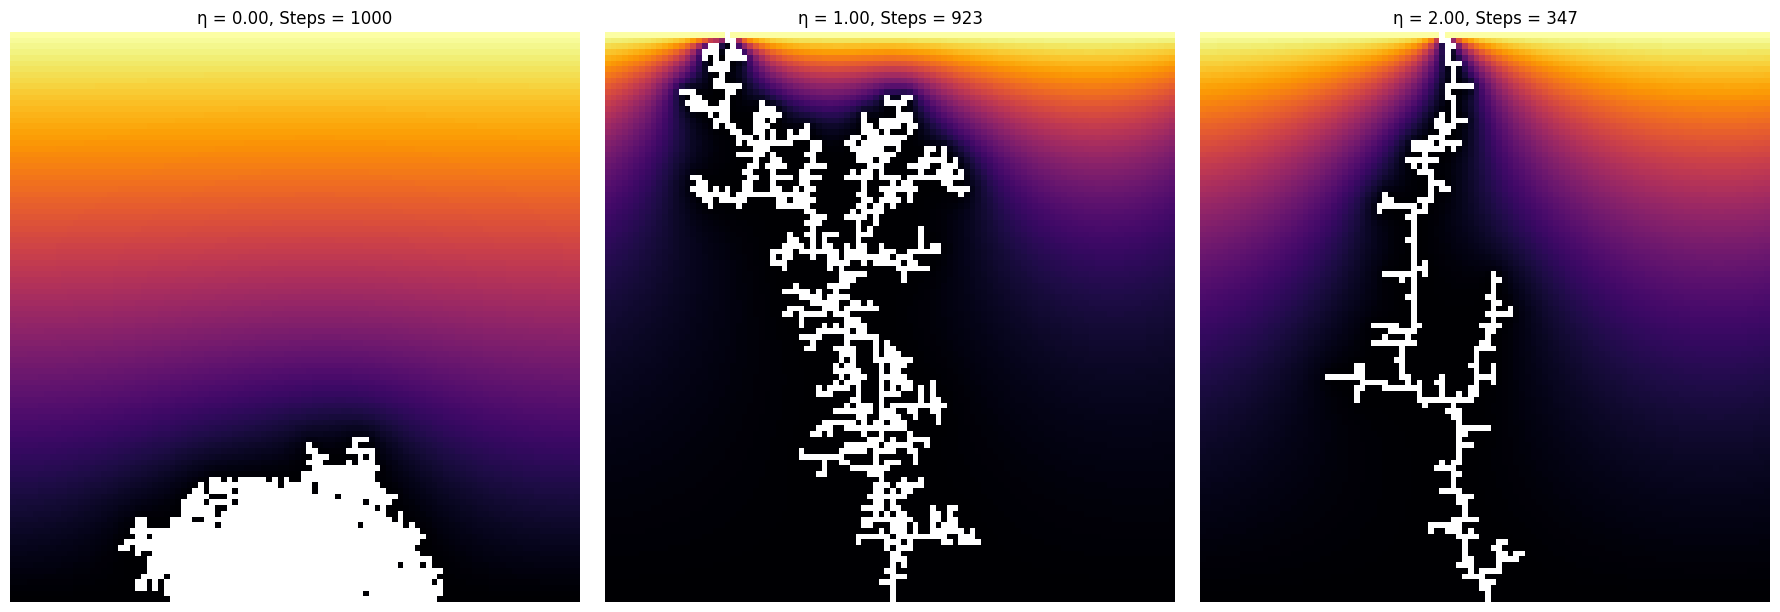

In [4]:
plot_many_dla((100, 100), [0, 1, 2], 1000)

Computing fractal dimension for η = 0.50
Termination at step 2713 with 0.5
Fractal Dimension for η=0.50: 1.740
Computing fractal dimension for η = 0.67
Termination at step 2246 with 0.6666666666666666
Fractal Dimension for η=0.67: 1.702
Computing fractal dimension for η = 0.83
Termination at step 1348 with 0.8333333333333333
Fractal Dimension for η=0.83: 1.517
Computing fractal dimension for η = 1.00
Termination at step 1018 with 1.0
Fractal Dimension for η=1.00: 1.475
Computing fractal dimension for η = 1.17
Termination at step 914 with 1.1666666666666665
Fractal Dimension for η=1.17: 1.447
Computing fractal dimension for η = 1.33
Termination at step 777 with 1.3333333333333333
Fractal Dimension for η=1.33: 1.438
Computing fractal dimension for η = 1.50
Termination at step 405 with 1.5
Fractal Dimension for η=1.50: 1.384
Computing fractal dimension for η = 1.67
Termination at step 436 with 1.6666666666666665
Fractal Dimension for η=1.67: 1.413
Computing fractal dimension for η = 1.83


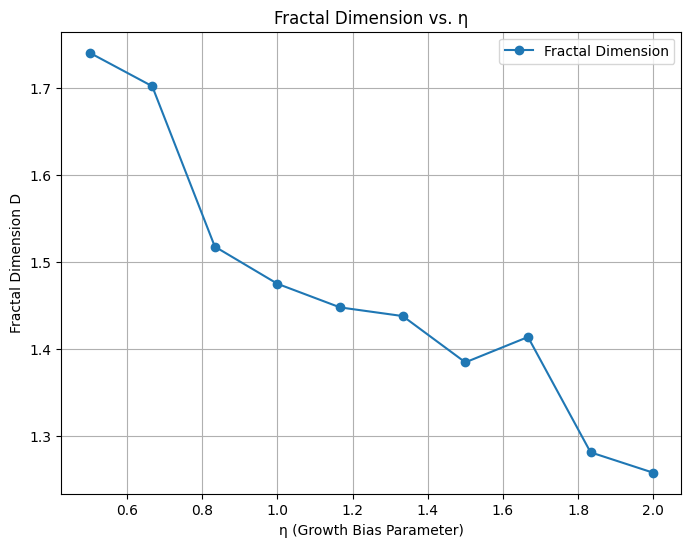

In [5]:
# Run for single iterations
eta_values = np.linspace(0.5, 2.0, 10)  
eta_vals, fractal_dims = compute_fractal_dimensions(eta_values)

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(eta_vals, fractal_dims, marker='o', linestyle='-', label="Fractal Dimension")
plt.xlabel("η (Growth Bias Parameter)")
plt.ylabel("Fractal Dimension D")
plt.title("Fractal Dimension vs. η")
plt.legend()
plt.grid()
plt.show()

In [ ]:

# Run the function with multiple stochastic trials
eta_values = np.linspace(0.5, 2.0, 5)  
eta_vals, fractal_means, fractal_stds = stochastic_runs_fd(eta_values, runs=25, grid_size=(100,100))

# Save them into a .npz file
np.savez("stochastic_fractal100by100.npz", eta_vals=eta_vals, fractal_means=fractal_means, fractal_stds=fractal_stds)
data = np.load("stochastic_fractal100by100.npz")

# Extract them
eta_vals = data["eta_vals"]
fractal_means = data["fractal_means"]
fractal_stds = data["fractal_stds"]

# Plot the results with error bars
plt.figure(figsize=(8, 6))
plt.errorbar(eta_vals, fractal_means, yerr=fractal_stds, fmt='o-', label="Fractal Dimension (Mean ± Std)")
plt.xlabel("η (Growth Bias Parameter)")
plt.ylabel("Fractal Dimension D")
plt.title("Fractal Dimension vs. η (Averaged over Multiple Runs)")
plt.legend()
plt.grid()
plt.show()

Computing fractal dimension for η = 0.50 over 25 runs...
  Run 1/25 for η = 0.50
Termination at step 2281 with 0.5
  Run 2/25 for η = 0.50
Termination at step 2608 with 0.5
  Run 3/25 for η = 0.50
Termination at step 2481 with 0.5
  Run 4/25 for η = 0.50
Termination at step 2469 with 0.5
  Run 5/25 for η = 0.50
Termination at step 2555 with 0.5
  Run 6/25 for η = 0.50


In [ ]:

# Run the function with multiple stochastic trials
eta_values = np.linspace(0.5, 2.0, 5)  
eta_vals, fractal_means, fractal_stds = stochastic_runs_fd(eta_values, runs=25, grid_size=(200,200))

# Save them into a .npz file
np.savez("stochastic_fractal_200by200.npz", eta_vals=eta_vals, fractal_means=fractal_means, fractal_stds=fractal_stds)
data = np.load("stochastic_fractal_200by200.npz")

# Extract them
eta_vals = data["eta_vals"]
fractal_means = data["fractal_means"]
fractal_stds = data["fractal_stds"]

# Plot the results with error bars
plt.figure(figsize=(8, 6))
plt.errorbar(eta_vals, fractal_means, yerr=fractal_stds, fmt='o-', label="Fractal Dimension (Mean ± Std)")
plt.xlabel("η (Growth Bias Parameter)")
plt.ylabel("Fractal Dimension D")
plt.title("Fractal Dimension vs. η (Averaged over Multiple Runs)")
plt.legend()
plt.grid()
plt.show()

In [ ]:

grid_shape = (100, 100)
eta_values = np.linspace(0, 2.0, 10)       # 10 values for eta from 0.5 to 2.0
omega_values = np.linspace(1.0, 1.99, 10)       # 10 values for omega from 1.0 to 1.9
growth_steps = 3000

# Run experiments for each combination of eta and omega.
avg_iters = optimal_omega_eta(grid_shape, eta_values, omega_values, growth_steps=growth_steps)

# Create a meshgrid for plotting.
Omega, Eta = np.meshgrid(omega_values, eta_values)

# 3D Mesh Plot: x-axis: omega, y-axis: eta, z-axis: average iterations.
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Omega, Eta, avg_iters, cmap='viridis', edgecolor='none')
ax.set_xlabel("Omega (ω)")
ax.set_ylabel("Eta (η)")
ax.set_zlabel("Average SOR Iterations")
ax.set_title(f"Average SOR Iterations vs. ω and η (Grid: {grid_shape}, Steps: {growth_steps})")
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [ ]:

grid_shape = (100, 100)
eta_values = np.linspace(0, 2.0, 10)       # 10 values for eta from 0.5 to 2.0
omega_values = np.linspace(1.7, 1.9, 10)       # 10 values for omega from 1.0 to 1.9
growth_steps = 3000

# Run experiments for each combination of eta and omega.
avg_iters = optimal_omega_eta(grid_shape, eta_values, omega_values, growth_steps=growth_steps)

# Create a meshgrid for plotting.
Omega, Eta = np.meshgrid(omega_values, eta_values)

# 3D Mesh Plot: x-axis: omega, y-axis: eta, z-axis: average iterations.
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Omega, Eta, avg_iters, cmap='viridis', edgecolor='none')
ax.set_xlabel("Omega (ω)")
ax.set_ylabel("Eta (η)")
ax.set_zlabel("Average SOR Iterations")
ax.set_title(f"Average SOR Iterations vs. ω and η (Grid: {grid_shape}, Steps: {growth_steps})")
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

### Exercise 2.2: Monte Carlo DLA

(np.float64(-0.5), np.float64(99.5), np.float64(99.5), np.float64(-0.5))

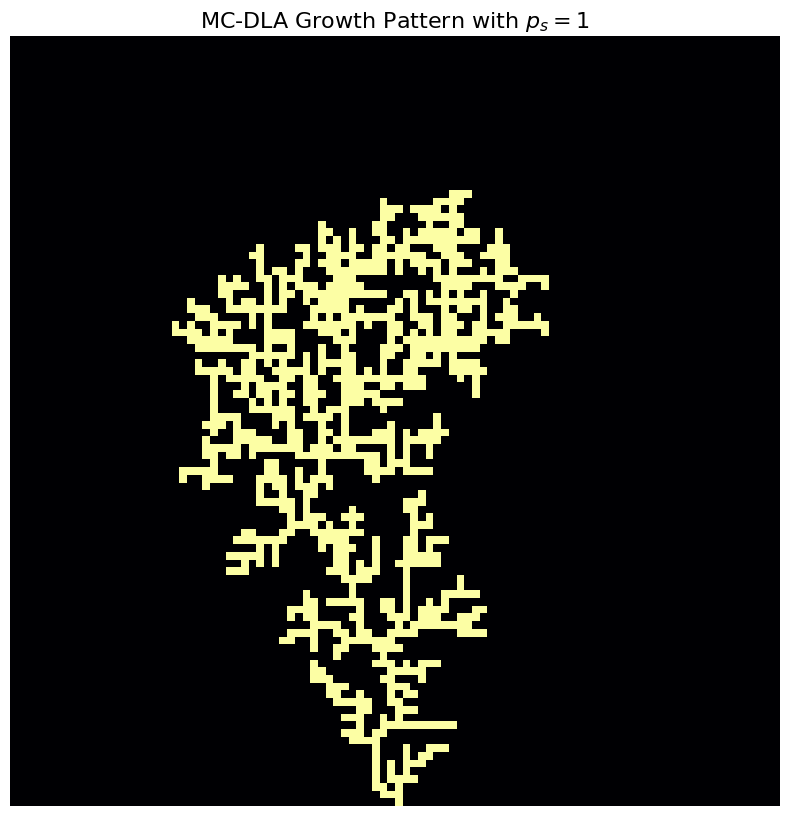

In [36]:
from src.mc_dla_16 import run_single_mc_dla

grid_size = 100
iterations = 50000
max_growth_steps = 1000
sticking_prob = 1

steps, grid = run_single_mc_dla(grid_size, max_growth_steps, iterations, sticking_prob, show_animation=False, show_walkers=False, show_final=False)
plt.figure(figsize=(10, 10))
plt.imshow(grid, cmap='inferno')
plt.title(f'MC-DLA Growth Pattern with $p_s=1$', fontsize=16)
plt.axis('off')

Running for sticking probability: 0.2


KeyboardInterrupt: 

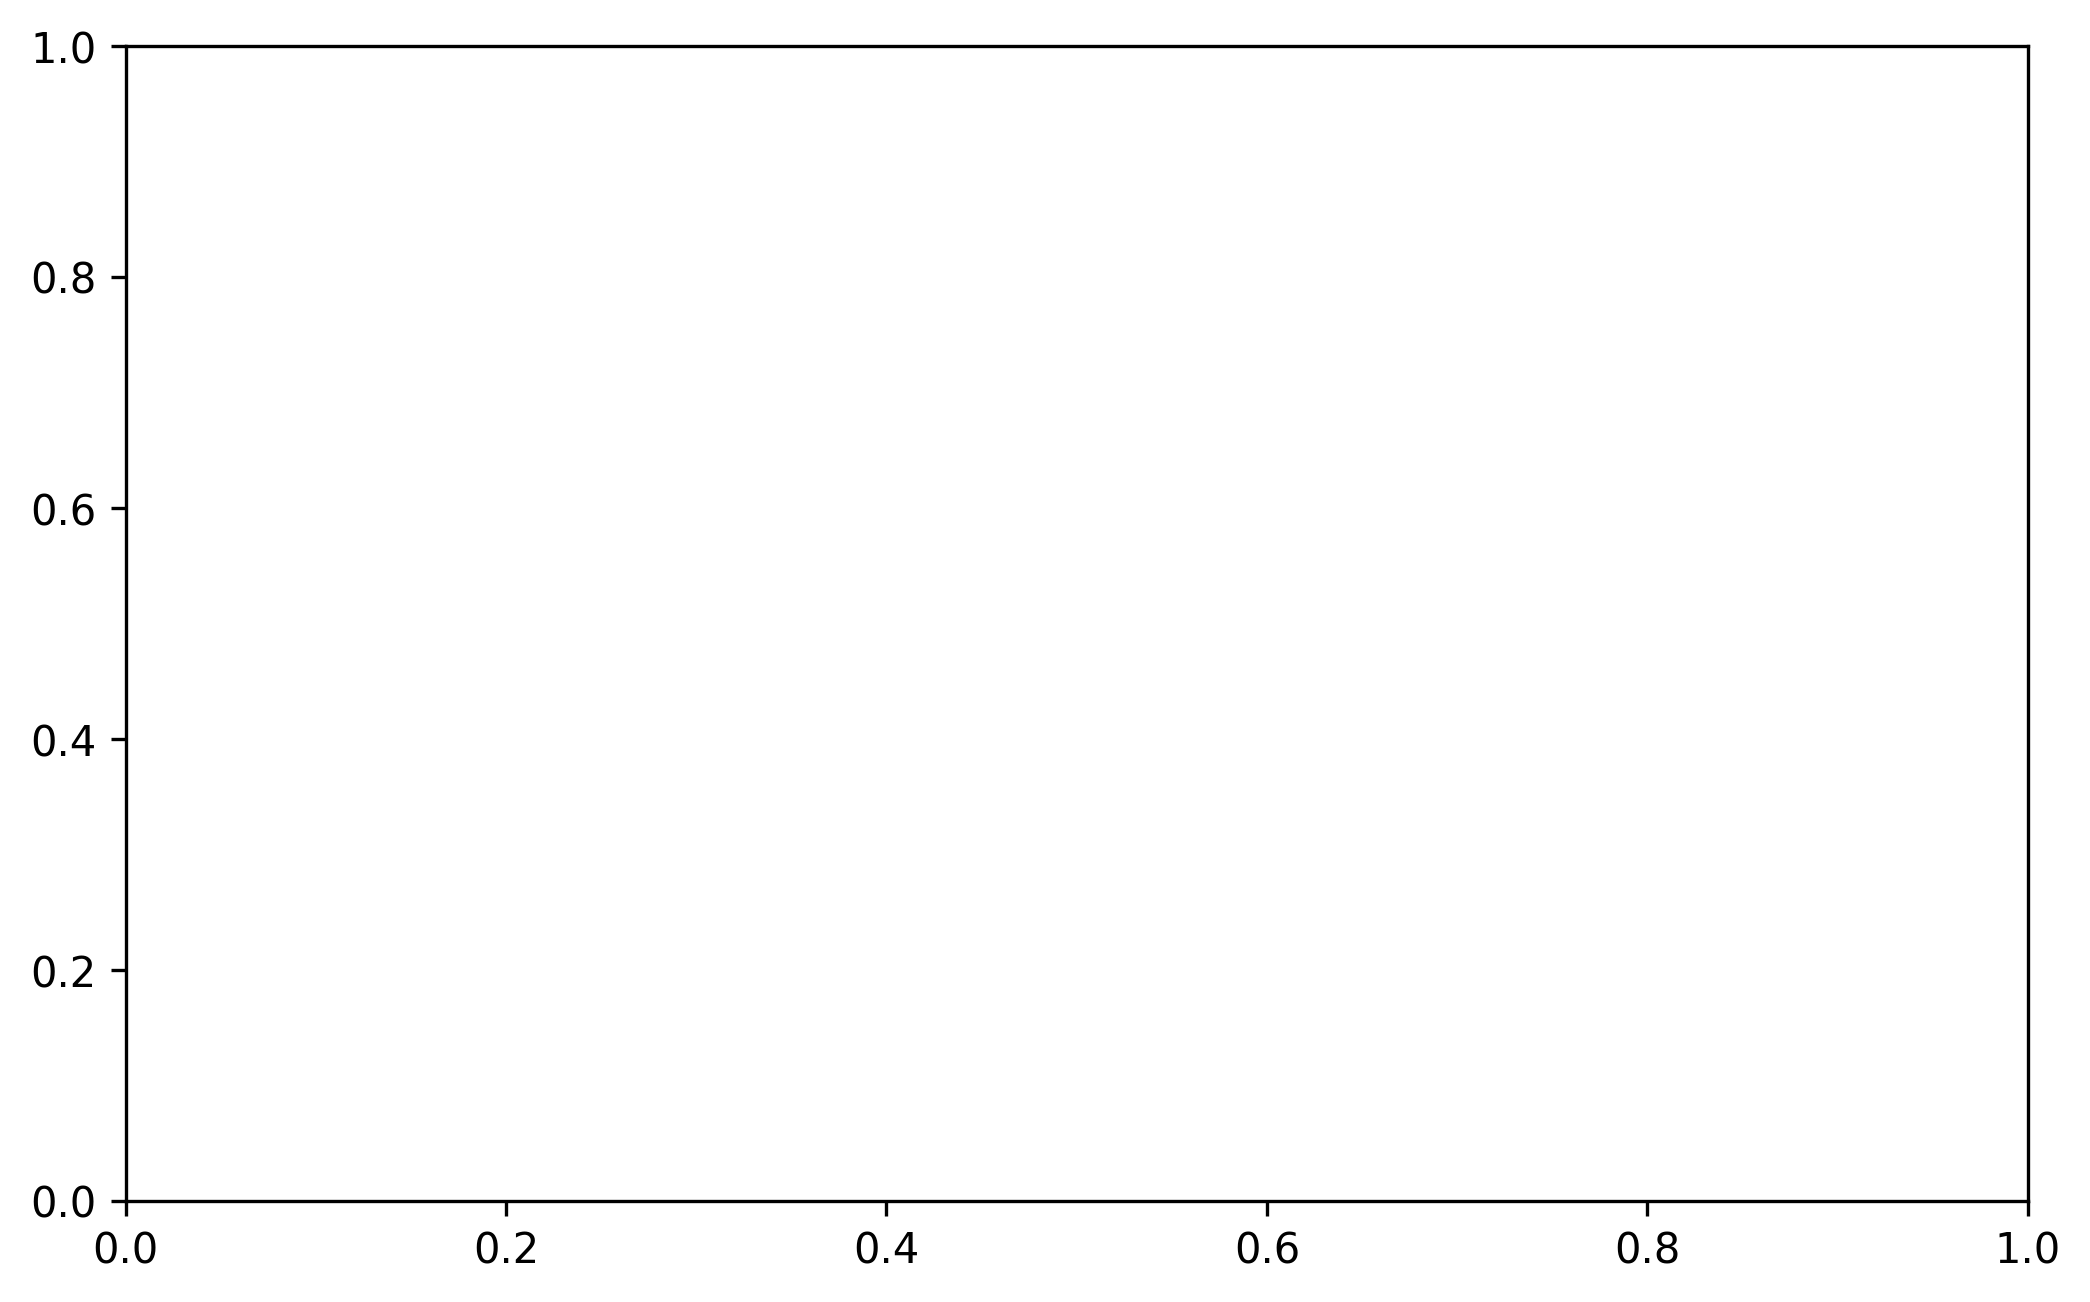

In [ ]:
from src.mc_dla_18 import run_single_mc_dla, compute_fractal_dimensions_mc_dla

grid_size = 100
iterations = 50000
max_growth_steps = 1000

# plot for 4 different sticking probabilities in a single row
plt.figure(figsize=(18, 5), dpi=300)
fractal_dims = dict()

probs = [0.2, 0.4]
for i, sticking_prob in enumerate(probs):
    print(f'Running for sticking probability: {sticking_prob}')
    plt.subplot(1, len(probs), i + 1) 
    for _ in range(5):
        steps, _ = run_single_mc_dla(grid_size, max_growth_steps, iterations, sticking_prob, show_animation=False, show_walkers=False, show_final=False)
        fractal_dims[sticking_prob] = compute_fractal_dimensions_mc_dla(steps)
    plt.imshow(grid, cmap='inferno')
    plt.title(f'$p_s$: {sticking_prob}', fontsize=16)
    plt.axis('off')
    
plt.suptitle('MC-DLA Growth Patterns for Different Sticking Probabilities', fontsize=18)
plt.tight_layout()


# Plot fractal dims mean and std
plt.figure(figsize=(8, 5))
plt.plot(list(fractal_dims.keys()), [np.mean(v) for v in fractal_dims.values()], marker='o', label='Mean Fractal Dimension')
plt.errorbar(list(fractal_dims.keys()), [np.mean(v) for v in fractal_dims.values()], yerr=[np.std(v) for v in fractal_dims.values()], fmt='o', label='Std Deviation')
plt.xlabel('Sticking Probability ($p_s$)')
plt.ylabel('Fractal Dimension D')
plt.title('Fractal Dimension vs. $p_s$')
plt.grid()
plt.show()



### Exercise 2.3: The Gray-Scott model

The Gray-Scott model describes a system of chemical reaction where two different species $U$ and $V$ are present. The corresponding reaction-diffusion equations are:
\begin{align}
\frac{\partial u}{\partial t} &= D_u \nabla^2 u - u v^2 + f(1 - u), \\
\frac{\partial v}{\partial t} &= D_v \nabla^2 v + u v^2 - (f + k)v.
\end{align}

where $D_u$ and $D_v$ are diffusion constants, $f$ is the rate at which $U$ is supplied, and $f+k$ is the rate at which $V$ decays.

In this experiment, we will investigate different parameter values for $f$ and $k$ and plot/animate the resulting concentration of the species $U$. Below are some parameters that can be modified by the user, including grid size $N$, $dx$, and $dt$

In [32]:
animation_time = 32000
num_frames = 400

N = 300
dx = 1
dt = 1

Below we have four different parameter combinations. The first two values represent $D_u$ and $D_v$, which are fixed, and the last two values represent $f$ and $k$. The latter three patterns ($\theta$, $\lambda$, and $\mu$) are from J. E. Pearson, SCIENCE, 1993.

In [33]:
# Original (parameter combination listed in assignment)
param_comb_1 = np.array([0.16, 0.08, 0.035, 0.060], dtype=float)
# theta pattern
param_comb_2 = np.array([0.16, 0.08, 0.04, 0.06], dtype=float)
# lambda pattern
param_comb_3 = np.array([0.16, 0.08, 0.04, 0.065], dtype=float)
# mu pattern
param_comb_4 = np.array([0.16, 0.08, 0.05, 0.065], dtype=float)

We now plot each parameter combination at three different time steps:

In [34]:
# Plot original pattern
plot_gray_scott(times=[1000, 5000, 15000], N=N, dx=dx, dt=dt, params=param_comb_1)

AttributeError: module 'numba' has no attribute 'core'

In [ ]:
# Plot theta pattern
plot_gray_scott(times=[1000, 5000, 15000], N=N, dx=dx, dt=dt, params=param_comb_2)

In [ ]:
# Plot lambda pattern
plot_gray_scott(times=[2000, 8000, 30000], N=N, dx=dx, dt=dt, params=param_comb_3)

In [ ]:
# Plot mu pattern
plot_gray_scott(times=[5000, 50000, 150000], N=N, dx=dx, dt=dt, params=param_comb_4)

Since the evolution of the system can hard to visualise with static plots, we have implemented functionality to animate the system. The used can insert the parameter combination.

In [30]:
ani = animate_gray_scott(num_frames=num_frames, time=animation_time, N=N, dx=dx, dt=dt, params=param_comb_3)
HTML(ani.to_jshtml())

AttributeError: module 'numba' has no attribute 'core'